In [ ]:
from PIL import Image, ImageEnhance

img = Image.open(image)
enhancer = ImageEnhance.Contrast(img)
img = enhancer.enhance(2)
img.show()


In [ ]:
"""Adaptive Threshold """
import cv2
import numpy as np 
image='wrong_HOG_Mataji\MatajiGaushala_Cow_Female_4550.png'
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thersh1= cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,199,5)
thersh2= cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,199,5)
thersh3= cv2.adaptiveThreshold(img,255,cv2.CALIB_CB_ADAPTIVE_THRESH,cv2.THRESH_OTSU,199,5)

cv2.imshow('Thresh Mean & BIN ', thersh1)
cv2.waitKey()
cv2.destroyAllWindows()

cv2.imshow('Thresh Gaussian BIN', thersh2)
cv2.waitKey()
cv2.destroyAllWindows()

cv2.imshow('Thresh Mean OTSU', thersh3)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
image='wrong_HOG_Mataji\MatajiGaushala_Cow_Female_4550.png'
""" CNN Image Pre-Processing
"""
import cv2
import numpy as np 
from skimage import exposure
from skimage import feature

kernel1 = np.array([[0, 4,     6,  4, 0],
                   [4, 16,   24, 16, 4],
                   [6, 24, -476, 24, 6],
                   [4, 16,   24, 16, 4],
                   [0, 4,     6,  4, 0]])
kernel1= -kernel1 / 256

img = cv2.imread(image)
cv2.imshow('Normal Image', img)
cv2.waitKey()
cv2.destroyAllWindows()

#image=np.array(img)
#img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)
#cv2.imshow('unsharp mask', img)
#cv2.waitKey()

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('greyed', img)
cv2.waitKey()
cv2.destroyAllWindows()

clahe = cv2.createCLAHE(clipLimit =3, tileGridSize=(18,18))
img = clahe.apply(img)
cv2.imshow('clahe', img)
cv2.waitKey()
cv2.destroyAllWindows() # ............



#ret, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
#ret, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)    #.........
#cv2.imshow('Thresh', img)
#cv2.waitKey()
#cv2.destroyAllWindows()


#img = cv2.bitwise_not(img)
#cv2.imshow('bitwise not', img)
#cv2.waitKey() 
#cv2.destroyAllWindows()

#9, 17,17 2,2
# 20, 3,3  20,20- NEW      (12, 5, 20)
(H, hogImage) = feature.hog(img, orientations=9, pixels_per_cell=(6,6),cells_per_block=(4,4), transform_sqrt=True, block_norm="L1", visualize=True) 
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
img = hogImage.astype("uint8")
print(H)
print(H.shape)
cv2.imshow('hog', img)
cv2.waitKey()
cv2.destroyAllWindows()
#(clipLimit =14, tileGridSize=(19,19))

In [ ]:
image='wrong_HOG_Mataji\MatajiGaushala_Cow_Female_4550.png'
""" HOG random Idea
"""
import cv2
import numpy as np 
from skimage import exposure
from skimage import feature
img = cv2.imread(image)

for i in range(0,3):
  chimg=img[:,:,i]
  #image = np.stack((image,)*3, axis=-1)
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  imgch = clahe.apply(chimg)
  (H, hogImage) = feature.hog(img, orientations=9, pixels_per_cell=(6,6),cells_per_block=(4,4), transform_sqrt=True, block_norm="L1", visualize=True) 
  hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
  img = hogImage.astype("uint8")
  cv2.imshow('hog', img)
  cv2.waitKey()
  cv2.destroyAllWindows()
  if i==0:
      r = img
  if i==1:
      g = img
  if i==2:
      b = img
x=cv2.merge((r,g,b))


In [ ]:
"""Morphological Filters
"""
retinal_disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
Topen = cv2.morphologyEx(clahe_img,cv2.MORPH_OPEN,retinal_disc)
Tclose = cv2.morphologyEx(Topen, cv2.MORPH_CLOSE, retinal_disc)
TopHat = (clahe_img - Tclose)
print("TOP HAT")
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
min_image = cv2.erode(TopHat, kernel)
min_image = cv2.dilate(min_image, kernel)

In [1]:

image='wrong_HOG_Mataji\MatajiGaushala_Cow_Female_3404_NP.png'
""" LAB_CLAHE
"""
import cv2
import numpy as np 
from skimage import exposure
from skimage import feature


img = cv2.imread(image)
cv2.waitKey()


lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow("lab",lab)
cv2.waitKey()


#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
cv2.imshow('l_channel', l)
cv2.waitKey()

cv2.imshow('a_channel', a)
cv2.waitKey()

cv2.imshow('b_channel', b)
cv2.waitKey()


#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
cv2.imshow('CLAHE output', cl)
cv2.waitKey()


#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
cv2.imshow('limg', limg)
cv2.waitKey()

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2.imshow('final', final)
cv2.waitKey()

cv2.destroyAllWindows()

#_____END_____#

In [16]:
""" Random BW EDGE Detection kernal
"""
image='wrong_HOG_Mataji\MatajiGaushala_Cow_Female_3404_NP.png'
import cv2
import numpy as np 
img = cv2.imread(image)
cv2.imshow('Normal Image', img)
cv2.waitKey()
cv2.destroyAllWindows()

Kernal2= np.array([[   0,  0,-2.5,   0,   0],
                   [   0,  0,  -1,   0,   0],
                   [-2.5, -1,   12, -1,-2.5],
                   [   0,  0,   -1,  0,   0],
                   [   0,  0, -2.5,  0,   0]])
img=np.array(img)
img = cv2.filter2D(src=img, ddepth=-1, kernel=Kernal2)
cv2.imshow('Border Edge Detction', img)
cv2.waitKey()
cv2.destroyAllWindows()


In [12]:
""" Unsharp Mask 
"""
import cv2
import numpy as np 
image='wrong_HOG_Mataji\MatajiGaushala_Cow_Female_3404_NP.png'


img = cv2.imread(image)
cv2.imshow('Normal Image', img)
cv2.waitKey()
#UNSHARP MASK 
kernel = np.array([[1, 4,     6,  4, 1],
                   [4, 16,   24, 16, 4],
                   [6, 24, -476, 24, 6],
                   [4, 16,   24, 16, 4],
                   [1, 4,     6,  4, 1]])
kernel= -kernel / 256

image=np.array(img)
image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

cv2.imshow('Sharpened', image_sharp)
cv2.waitKey()

gray = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2GRAY)
cv2.imshow('greyed', gray)

cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:

img = cv2.bitwise_not(img)
cv2.imshow('bitwise not', img)
cv2.waitKey() 
cv2.destroyAllWindows()

In [ ]:
"""
Apply sharpening using kernel
"""
import cv2
import numpy as np 
image='wrong_HOG_Mataji\MatajiGaushala_Cow_Female_3404_NP.png'
img = cv2.imread(image)
cv2.imshow('Normal Image', img)
cv2.waitKey()
kernel3 = np.array([[0, -1,  0],
                    [-1,  5, -1],
                    [0, -1,  0]])
npimage=np.array(img)
sharp_img = cv2.filter2D(src=npimage, ddepth=-1, kernel=kernel3)

cv2.imshow('Original', image)
cv2.imshow('Sharpened', sharp_img)
cv2.waitKey()
gray = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2GRAY)
cv2.imshow('Sharpened_grey', gray)

cv2.destroyAllWindows()

In [27]:
""" HOG
"""
image='wrong_HOG_Mataji\MatajiGaushala_Cow_Female_3404_NP.png'

import cv2
import numpy as np 
from skimage import exposure
from skimage import feature
#HOG
img = cv2.imread(image)
cv2.imshow('Normal Image', img)
cv2.waitKey()
kernel3 = np.array([[0, -1,  0],
                    [-1,  5, -1],
                    [0, -1,  0]])
npimage=np.array(img)

#sharp_img = cv2.filter2D(src=npimage, ddepth=-1, kernel=kernel3)
#cv2.imshow('greyed', sharp_img)
#cv2.waitKey()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#img = np.stack((gray,)*3, axis=-1)
#cv2.imshow('stacked', img)
#cv2.waitKey()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(gray)
cv2.imshow('greyed', cl)
cv2.waitKey()
(H, hogImage) = feature.hog(cl, orientations=12, pixels_per_cell=(5,5),cells_per_block=(3,3), transform_sqrt=True, block_norm="L1", visualize=True) 
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
cv2.imshow('hog', hogImage)
cv2.waitKey()
cv2.destroyAllWindows()
y = np.expand_dims(hogImage, axis=-1)
y.shape

(500, 391, 1)

original Shape (486, 364, 3)
Shape after changing individual Channel to Greyscale (486, 364, 3)
(486, 364)


(486, 364, 1)

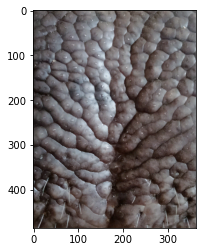

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#image='wrong_HOG_Mataji\MatajiGaushala_Cow_Female_3404_NP.png'
image='C:\\Users\\balaj\\Desktop\\Training\\wrong_HOG_Mataji\\MatajiGaushala_Cow_Female_3612_NP.png'

img = cv2.imread(image)
print("original Shape",img.shape)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
cv2.waitKey()
#channel splitting
imgR = img[:,:,0]
imgG = img[:,:,1]
imgB = img[:,:,2]

#clahe operation on the Green channel of image
clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8,8))

imgR = clahe.apply(imgR)
cv2.imshow('Individual Channel Grayscale ', imgR)
cv2.waitKey()

imgG = clahe.apply(imgG)
cv2.imshow('Individual Channel Grayscale ', imgG)
cv2.waitKey()

imgB = clahe.apply(imgB)
cv2.imshow('Individual Channel Grayscale ', imgB)
cv2.waitKey()


img = cv2.merge((imgR,imgG,imgB))
print("Shape after changing individual Channel to Greyscale",img.shape)


cv2.imshow('Individual Channel Grayscale ', img)
cv2.waitKey()
cv2.destroyAllWindows()


print(imgG.shape)
y = np.expand_dims(imgG, axis=-1)
y.shape




In [ ]:
"""Collective Histogram
"""

import numpy as np

from skimage import io

import matplotlib.pyplot as plt

import os

import os.path

nb_bins = 256

count_r = np.zeros(nb_bins)

count_g = np.zeros(nb_bins)

count_b = np.zeros(nb_bins)

 

root = 'C:/Users/Sukirti/Desktop/jupyter python/Classification/'

for image in os.listdir(root): 

 if image.endswith('.png'):

    x = io.imread(root+image)

    hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])

    hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])

    hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])

    count_r += hist_r[0]

    count_g += hist_g[0]

    count_b += hist_b[0]

 

bins = hist_r[1]

#fig = plt.figure()

 

plt.bar(bins[:-1], count_r, color='r', alpha=0.33)

plt.bar(bins[:-1], count_g, color='g', alpha=0.33)

plt.bar(bins[:-1], count_b, color='b', alpha=0.33)

plt.show()

counts, bins, bars = plt.hist()

#yvals = np.array(histogram)[1:-1]

In [ ]:
"""Morphological Operations Skeletonisation and Thinning """

from skimage import morphology, img_as_float, color, io
import matplotlib.pyplot as plt

dir='test\MatajiGaushala_Cow_Female_4220NA.png'
image = img_as_float(color.rgb2gray(io.imread(dir)))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)


f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 16))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')

ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thin')
plt.imsave("Test.png", out_thin, cmap="gray")

#plt.savefig('C:\\Users\\Sukirti\\AppData\\Local\\Programs\\Python\\Python37\\data\\4788_Thin.png')
plt.show()

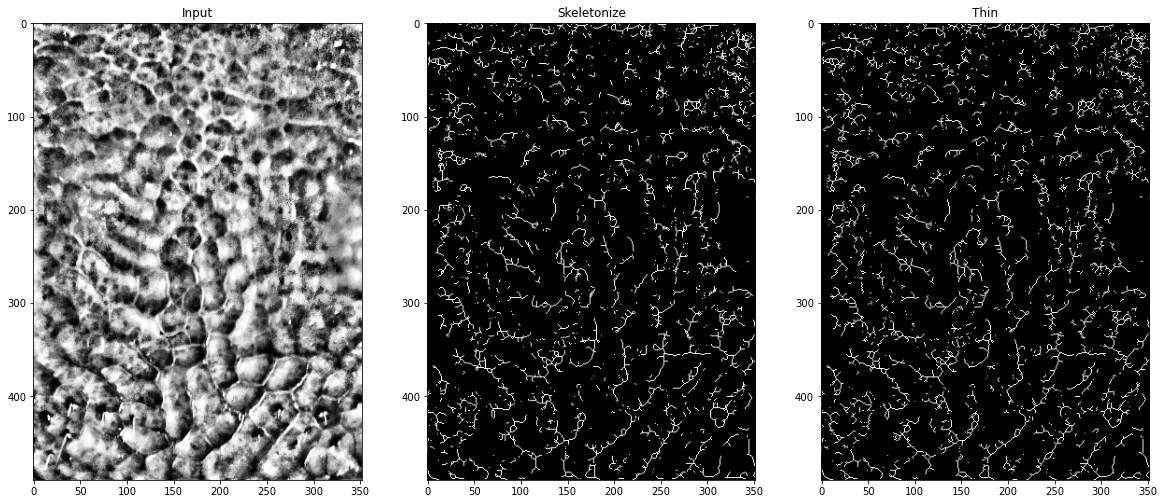

In [5]:
"""CLAHE Thinning using skimage """
import cv2
import matplotlib.pyplot as plt
from skimage import morphology, img_as_float, color, io, exposure
#from skimage import img_as_ubyte #for converting from skimage to cvimage 

basedir='c:\\Users\\balaj\\Desktop\\Training\\'
dir= basedir + 'wrong_HOG_Mataji\MatajiGaushala_Cow_Female_4442_NP.png'
image = color.rgb2gray(io.imread(dir))
image = exposure.equalize_adapthist(image, kernel_size=32, clip_limit=0.6, nbins=256) #clahe
image = img_as_float(image)
image_binary = image < 0.28
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 16))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')

ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thin')
plt.imsave("Test.png", out_thin, cmap="gray")

#plt.savefig('C:\\Users\\Sukirti\\AppData\\Local\\Programs\\Python\\Python37\\data\\4788_Thin.png')
plt.show()

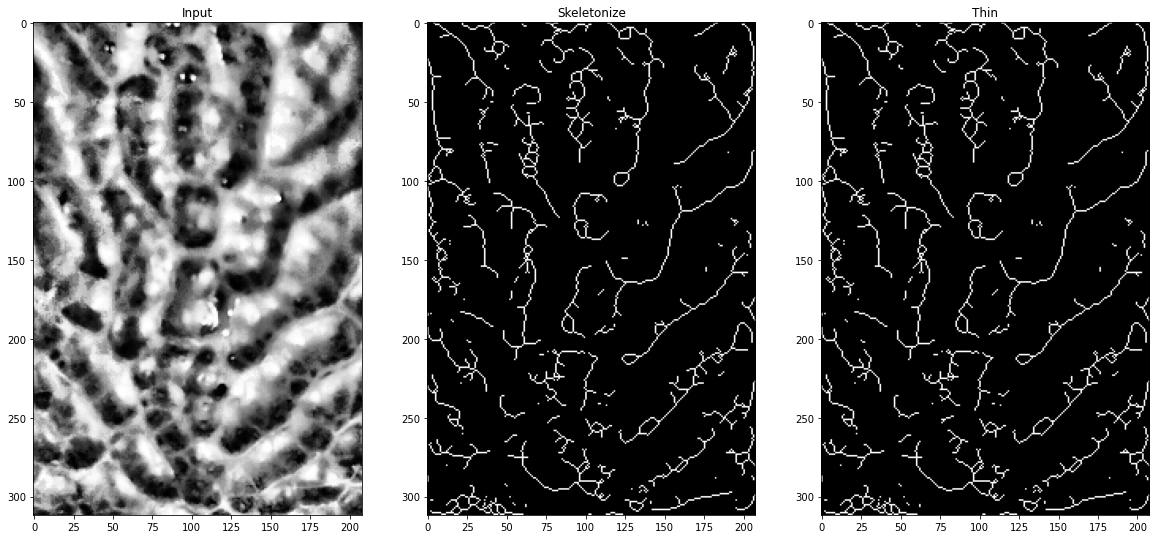

In [3]:
"""CLAHE Morphological Operations Thinning using skimage changes """  
import cv2
import matplotlib.pyplot as plt
from skimage import morphology, img_as_float, color, io, exposure
#from skimage import img_as_ubyte #for converting from skimage to cvimage 

basedir='c:\\Users\\balaj\\Desktop\\Training\\'
dir= basedir + 'Datasets\sample\ConsolidatedRaal_Cow_Female_12.png'
image = color.rgb2gray(io.imread(dir))
image = exposure.equalize_adapthist(image, kernel_size=32, clip_limit=2.3, nbins=256) #clahe
image = img_as_float(image)
image_binary = image < 0.4
out_thin = morphology.thin(image_binary)

out_skeletonize = morphology.skeletonize(out_thin)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 16))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')

ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thin')
plt.imsave("Test.png", out_thin, cmap="gray")

#plt.savefig('C:\\Users\\Sukirti\\AppData\\Local\\Programs\\Python\\Python37\\data\\4788_Thin.png')
plt.show()

In [ ]:
'''print bool array fully '''
import cv2
import matplotlib.pyplot as plt
from skimage import morphology, img_as_float, color, io, exposure
#from skimage import img_as_ubyte #for converting from skimage to cvimage 

basedir='c:\\Users\\balaj\\Desktop\\Training\\'
dir= basedir + 'wrong_HOG_Mataji\MatajiGaushala_Cow_Female_3638_np.png'
image = color.rgb2gray(io.imread(dir))
image = exposure.equalize_adapthist(image, kernel_size=32, clip_limit=2.3, nbins=256) #clahe
image = img_as_float(image)
image_binary = image < 0.4
import sys
import numpy as np

with np.printoptions(threshold=sys.maxsize):
    print(image_binary)

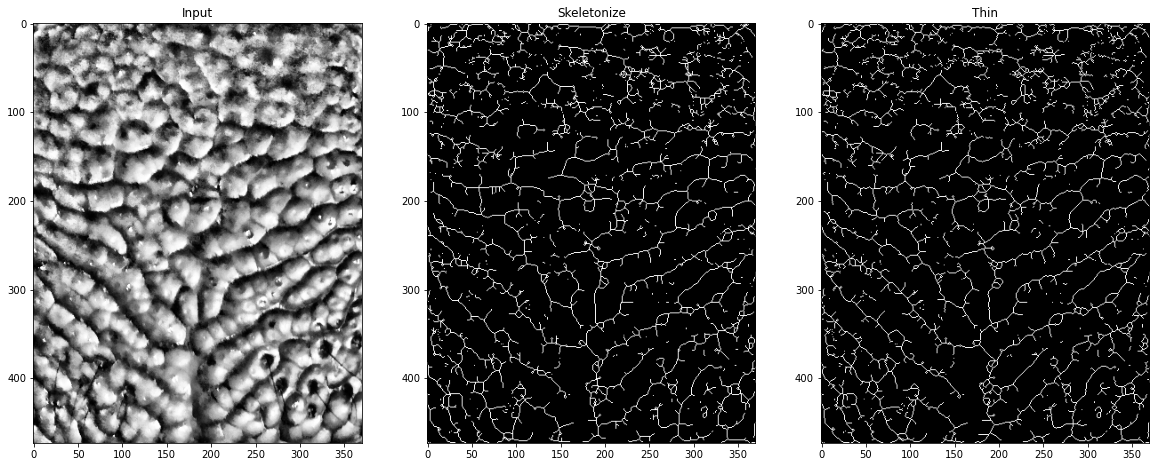

In [72]:
"""CLAHE Morphological Operations after morph open and close """  
import cv2
import matplotlib.pyplot as plt
from skimage import morphology, img_as_float, color, io, exposure
from skimage import img_as_ubyte #for converting from skimage to cvimage 

basedir='c:\\Users\\balaj\\Desktop\\Training\\'
dir= basedir + 'wrong_HOG_Mataji\MatajiGaushala_Cow_Female_4141NPP.png' 
image = color.rgb2gray(io.imread(dir))
image = exposure.equalize_adapthist(image, kernel_size=32, clip_limit=2.3, nbins=256) #clahe   32,2.3
image = img_as_ubyte(image)

img_disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))  # keep 9 if there are noises
Topen = cv2.morphologyEx(image,cv2.MORPH_OPEN,img_disc)
Tclose = cv2.morphologyEx(Topen, cv2.MORPH_CLOSE, img_disc)

TopHat = (image - Tclose)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2)) #2 is stable under all the environmental conditions 

min_image = cv2.erode(TopHat, kernel)
min_image = cv2.dilate(min_image, kernel)
#image= cv2.bitwise_not(min_image)

image = img_as_float(image)
image_binary = image < 0.4
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 16))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')

ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thin')
plt.imsave("Test.png", out_thin, cmap="gray")

plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import morphology, img_as_float, color, io, exposure
from skimage import img_as_ubyte #for converting from skimage to cvimage 
dir = '' # enter the image directory
image = color.rgb2gray(io.imread(dir))
image = exposure.equalize_adapthist(image, kernel_size=32, clip_limit=2.3, nbins=256) #clahe   32,2.3
image = img_as_ubyte(image)

img_disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))  # keep 9 if there are noises
Topen = cv2.morphologyEx(image,cv2.MORPH_OPEN,img_disc)
Tclose = cv2.morphologyEx(Topen, cv2.MORPH_CLOSE, img_disc)
TopHat = (image - Tclose)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2)) #2 is stable under all the environmental conditions 

min_image = cv2.erode(TopHat, kernel)
min_image = cv2.dilate(min_image, kernel)
image= cv2.bitwise_not(min_image)

image = img_as_float(image)
image_binary = image < 0.4
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 16))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')

ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thin')
plt.imsave("Test.png", out_thin, cmap="gray")

plt.show()

In [3]:
#Apply Clahe
import cv2
import matplotlib.pyplot as plt
from skimage import morphology, img_as_float, color, io, exposure, img_as_ubyte
from imutils import paths
dir='./'
for imagePath in paths.list_images(dir):
    print(imagePath)
    image = color.rgb2gray(io.imread(imagePath))
    image = exposure.equalize_adapthist(image, kernel_size=16, clip_limit=2.3, nbins=256) #clahe
    #image = img_as_float(image)
    #image_binary = image < 0.4
    #out_skeletonize = morphology.skeletonize(image_binary)
    cvimg=img_as_ubyte(image)
    cv2.imwrite(imagePath, cvimg)

./test/3153\DhruvGaushala_Cow_Female_0.png
./test/3153\DhruvGaushala_Cow_Female_1.png
./test/3153\DhruvGaushala_Cow_Female_10.png
./test/3153\DhruvGaushala_Cow_Female_11.png
./test/3153\DhruvGaushala_Cow_Female_12.png
./test/3153\DhruvGaushala_Cow_Female_13.png
./test/3153\DhruvGaushala_Cow_Female_14.png
./test/3153\DhruvGaushala_Cow_Female_2.png
./test/3153\DhruvGaushala_Cow_Female_3.png
./test/3153\DhruvGaushala_Cow_Female_4.png
./test/3153\DhruvGaushala_Cow_Female_5.png
./test/3153\DhruvGaushala_Cow_Female_6.png
./test/3153\DhruvGaushala_Cow_Female_7.png
./test/3153\DhruvGaushala_Cow_Female_8.png
./test/3153\DhruvGaushala_Cow_Female_9.png


In [ ]:
#Clahe skeletonisation 
import cv2
import matplotlib.pyplot as plt
from skimage import morphology, img_as_float, color, io, exposure, img_as_ubyte
from imutils import paths

for imagePath in paths.list_images("Datasets\Vrindavan_overall"):
    print(imagePath)
    image = color.rgb2gray(io.imread(imagePath))
    image = exposure.equalize_adapthist(image, kernel_size=32, clip_limit=2.3, nbins=256) #clahe
    #gabor filter 
    #binary threshold 
    image = img_as_float(image)
    image_binary = image < 0.4
    out_skeletonize = morphology.skeletonize(image_binary)
    cvimg=img_as_ubyte(out_skeletonize)
    cv2.imwrite(imagePath, cvimg)

In [ ]:
import fingerprint_enhancer							# Load the library
import cv2

img = cv2.imread('', 0)					            	# read input image
out = fingerprint_enhancer.enhance_Fingerprint(img)		# enhance the fingerprint image
cv2.imshow('enhanced_image', out);						# display the result
cv2.waitKey(0)		